In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Generate a "population"

In [2]:
# generate 1 million samples from a normal distribution to simulate the population
population = np.random.normal(53.21, 4.23, 10**6)

In [3]:
population.shape

(1000000,)

/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

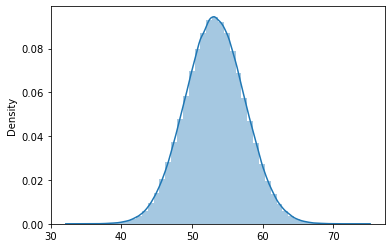

In [4]:
sns.distplot(population)

In [5]:
sample = np.random.choice(population, size=30, replace=False)

In [6]:
sample.mean()

53.36562055283152

<AxesSubplot:ylabel='Count'>

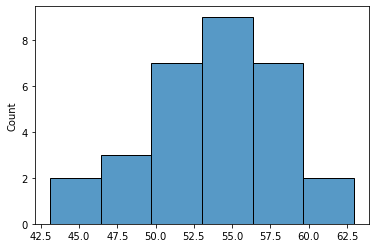

In [7]:
sns.histplot(sample)

# Bootstrap

In [8]:
bs = np.random.choice(sample, (len(sample), 1000), replace=True)

In [9]:
bs_means = bs.mean(axis=0)
bs_means_mean = bs_means.mean()
bs_means_mean

53.41032880150417

## Confidence interval

In [10]:
np.quantile(bs_means, 0.025)

51.89813357958946

In [11]:
np.quantile(bs_means, 0.975)

54.778625654572245

If this population were drawn from many different populations 95/100 of them would have a mean between 51.48 and 55.08.

# Bootstrap the Standard Deviation

The difference here is that we will calculate the standard deviation for each sample, then take the mean of the standard deviations.

In [12]:
bs_stds = bs.std(axis=0)
bs_std_mean = bs_stds.mean()
bs_std_mean

4.094649608233774

In [13]:
np.quantile(bs_stds, 0.025)

2.8541861842326126

In [14]:
np.quantile(bs_stds, 0.975)

5.172352140652382

Ok, thats a pretty wide range.

In [15]:
# patience, this will take some time
bs_big = np.random.choice(sample, (len(sample), 10**7), replace=True)

In [24]:
bs_stds = bs_big.std(axis=0)
bs_std_mean = bs_stds.mean()
bs_std_mean

4.111397279034328

In [25]:
np.quantile(bs_stds, 0.025)

2.9349648488028617

In [26]:
np.quantile(bs_stds, 0.975)

5.259575128539953

# compare results to the original distribution

In [21]:
# sns.distplot(population)

x = np.linspace(30, 80, 1000)

In [22]:
import scipy.stats as st

dist = st.norm(loc=bs_means_mean, scale=bs_std_mean)
y = dist.pdf(x)

/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


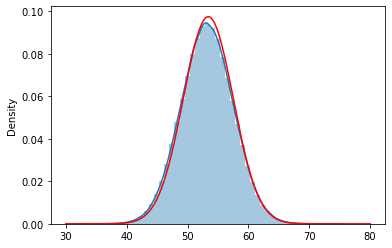

In [29]:
sns.distplot(population)
plt.plot(x,y, color='red')